# 탐색적 분석 (exploratory data analysis: EDA)  
- 데이터 분석의 첫 번째 단계로  
- 본격적인 데이터 분석을 수행하기에 전에 데이터의 전체적인 특성을 살펴보는 것
- 다양한 각도에서 데이터를 관찰하고 이해하는 과정    
- (수집한 데이터가 분석에 적절한지 알아보는 과정)  
- 그래프와 통계적 분석 방법을 활용하여 데이터 탐구 수행  
---
- 데이터의 양, 유형과 범위, 유효성, 비율, 분포 등 파악
- (분석하기에 데이터양이 적절한지, 쓸모있는 데이터인지 확인)
---
- 데이터 전처리를 같이 수행하기도 함
  - 데이터 클리닝 - 결측치 및 잘못된 값 처리
  - 스케일링 - 표준 스케일링, min-max 스케일링
  - 결측치/이상치 처리 - 결측치/이상치 탐지 및 제거/대체
  - 데이터 변환 - 로그 변환, 카테고리 인코딩 등


## 주택가격 데이터 탐색
- 사용 데이터 : 미국 아이오와 주의 에임즈(Ames) 지방의 주택 가격 정보 데이터
- 79개의 변수로 구성 

### 주택가격 데이터 탐색 수행 작업

- 데이터 특성 파악 : 기본 정보 확인
  - df.info() : 컬럼 확인
  - features(컬럼) 설명 자료 활용
  - 박스 플롯으로 기초 통계 분포 확인 
  - 히스토그램으로 발생 빈도수 확인
  - distplot() 으로 분포 확인 (왜도/첨도 확인)
    - 정규분포에서 많이 벗어나 있으면 로그변환 수행 필요

- 목적변수(타겟 변수)와 다른 입력 변수(피처)들 과의 관계 확인
  - 히트맵으로 상관관계 파악
  - pairplot()으로 확인
  - 산포도로 확인 : 관계 및 이상치 파악

- 카테고리 특성과의 관계 확인
  - 박스플롯  확인
    -- 예) 평점에 따른 가격 차이  
           연도별 주택가격 변화 추이 확인

- 결측치 확인
- 이상치 확인
  - 확률 분포에서 찾기 : distplot()
  - 산포도로 찾기


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

# 경고 메시지 무시 설정
import warnings
warnings.filterwarnings(action='ignore')

In [3]:
import seaborn as sns

In [4]:
# 주택가격 데이터 
data = pd.read_csv("./데이터/house_price.csv").set_index("Id")
data.head(3)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [5]:
data.shape

(1460, 80)

## 데이터 특성 파악
- 특성 설명 : features(컬럼) 설명 자료 필요함 (도메인지식이 분석에 아주 중요함)
---
SalePrice: 판매가격(달러), 목적변수(예측하려는 대상 변수)  
MSSubClass : 건물 클래스  
MSZoning : 일반 구역 분류  
LotFrontage : 부동산에 연결된 거리의 선형 피트  
LotArea : 평방 피트 단위의 부지 크기  
Street : 도로 접근 유형  
Alley : 골목 접근 방식  
LotShape : 속성의 일반적인 모양  
LandContour : 부동산의 평탄도  
Utilities : 사용 가능한 유틸리티 유형  
LotConfig : 로트 구성  
LandSlope : 속성의 기울기  
Neighborhood : Ames 시 경계 내의 물리적 위치  
Condition1 : 간선도로 또는 철도와 인접  
Condition2 : 간선도로 또는 철도와의 근접성(초가 있는 경우)  
BldgType : 주거 유형  
HouseStyle : 주거 스타일  
OverallQual : 전체재질 및 마감품질  
OverallCond : 전체 상태 등급  
YearBuilt : 원래 건설 날짜  
YearRemodAdd : 리모델링 날짜  
RoofStyle : 지붕 유형  
RoofMatl : 지붕 재료  
ExterQual1st : 주택의 외부 피복  
ExterQual2nd : 주택의 외부 덮음(하나 이상의 재료인 경우)  
MasVnrType : 석조 베니어 유형  
MasVnrArea : 석조 베니어판 면적(제곱피트)  
ExterQual : 외장재 품질  
ExterCond : 외장재의 현황  
Foundation : 기반의 종류  
BsmtQual : 지하실 높이  
BsmtCond : 지하실의 일반 상태  
BsmtExposure : 파업 또는 정원 수준의 지하 벽  
BsmtFinType1 : 지하실 마감 면적의 품질  
BsmtFinSF1 : 1종 제곱피트 완성  
BsmtFinType2 : 두 번째 완성 영역의 품질(있는 경우)  
BsmtFinSF2 : 유형 2 완성 평방 피트  
BsmtUnfSF : 지하실의 미완성 평방 피트  
TotalBsmtSF : 지하실의 총 평방 피트  
Heating : 난방의 종류  
HeatingQC : 난방 품질 및 상태  
CentralAir : 중앙 에어컨  
Electrical : 전기 시스템  
1stFlrSF : 1층 평방피트  
2ndFlrSF : 2층 평방피트  
LowQualFinSF : 저품질 마감 평방 피트(모든 층)  
GrLivArea : 지상(지상) 거실 면적 평방피트  
BsmtFullBath : 지하 전체 욕실  
BsmtHalfBath : 지하 반 화장실  
FullBath : 등급 이상의 전체 욕실  
HalfBath : 등급 이상의 반욕  
Bedroom : 지하층 이상의 침실 수  
kitchen : 주방 수  
KitchenQual : 주방 품질  
TotRmsAbvGrd : 등급 이상의 총 방(화장실 제외)  
Functional : 홈 기능 등급  
Fireplaces : 벽난로의 수  
FireplaceQu : 벽난로 품질  
GarageType : 차고 위치  
GarageYrBlt : 차고 건설 연도  
GarageFinish : 차고 인테리어 마감  
GarageCars : 차고의 차고 크기  
GarageArea : 평방 피트의 차고 크기  
GarageQual : 차고 품질  
GarageCond : 차고 상태  
PavedDrive : 포장된 차도  
WoodDeckSF : 평방 피트의 목재 데크 면적  
OpenPorchSF : 평방 피트의 오픈 베란다 영역  
EnclosedPorch : 평방 피트의 닫힌 베란다 영역  
3SsnPorch : 제곱피트의 3계절 베란다 면적  
ScreenPorch : 평방 피트의 스크린 베란다 면적  
PoolArea : 평방 피트의 수영장 면적  
PoolQC : 수영장 품질  
Fence : 울타리 품질  
MiscFeature : 다른 범주에서 다루지 않는 기타 기능  
MiscVal : 기타 기능의 $값  
MoSold : 월 판매  
YrSold : 판매 연도  
SaleType : 판매유형  
SaleCondition : 판매조건 

In [6]:
# 복사본 사용 
df = data.copy()

In [7]:
# 모양 : 행, 열 수 확인
df.shape

(1460, 80)

In [8]:
# 기본 정보 확인
df.info()
# 컬럼(피처) 확인
# 빈 값 꽤 있음

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuilt    

### 결측치 확인  

In [14]:
# Null 값 및 피처 확인 : top10 출력 
# to_frame() : 데이터프레임으로 변환
# null 값이 많은 순으로 내림차순 정렬
nulls_df = df.isna().sum().sort_values(ascending=False).to_frame()
nulls_df.columns = ["nulls_num"]

In [15]:
df.isna().sum().values

array([   0,    0,  259,    0,    0, 1369,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,  872,    8,    0,    0,    0,   37,   37,   38,   37,
          0,   38,    0,    0,    0,    0,    0,    0,    1,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,  690,   81,   81,   81,    0,    0,   81,   81,    0,    0,
          0,    0,    0,    0,    0, 1453, 1179, 1406,    0,    0,    0,
          0,    0,    0])

In [17]:
# 각 특성마다 결측치가 발생한 비율 추가 
# 결측치 수 / 전체행 수
nulls_df["percent"] = (nulls_df["nulls_num"]/df.shape[0]*100).round(2)
nulls_df.head(20)

,nulls_num,percent
PoolQC,1453,99.52
MiscFeature,1406,96.30
Alley,1369,93.77
Fence,1179,80.75
MasVnrType,872,59.73
FireplaceQu,690,47.26
LotFrontage,259,17.74
GarageQual,81,5.55
GarageType,81,5.55
GarageFinish,81,5.55


### 결측치 확인하면 결측 전략 수립 필요
- 제거 : 중요 컬럼(도메인 지식 기반 판단) 아니면 가능
- 대체 : 평균 대체
- 그냥 둔다 : 다음단계에서 확인해야할게 있거나 그런경우 일단 확인후에 다음단계에서 처리하기로

#### 전략 예
- Electrical : 1개 결측이므로 행(레코드) 삭제 결정
- 나머지 결측 컬럼은 모두 삭제 : 집값을 결정하는데에 중요한 정보가 아니라 판단

In [19]:
# 삭제할 컬럼 인덱스 확인
nulls_df[nulls_df["nulls_num"]>1].index

df_del = df.drop(nulls_df[nulls_df["nulls_num"]>1].index, axis = 1)
df_del.shape

Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'MasVnrType', 'FireplaceQu',
       'LotFrontage', 'GarageQual', 'GarageType', 'GarageFinish', 'GarageCond',
       'GarageYrBlt', 'BsmtExposure', 'BsmtFinType2', 'BsmtQual',
       'BsmtFinType1', 'BsmtCond', 'MasVnrArea'],
      dtype='object')

(1460, 62)

In [24]:
#  결측치가 1개인 경우 행(샘플) 삭제
df_del = df_del.drop(df[df["Electrical"].isna()].index)
df_del.shape

(1459, 62)

In [30]:
# 최종 null 값 확인
df_del.isna().sum().max()
# df_del.isna().sum().sort_values(ascending=False).to_frame()

np.int64(0)

## 목적 변수 (타겟 값) 
- 주택 가격이므로 SalePrice가 목적변수 임
- 주택 가격 예측 

In [31]:
# 기초 통계값 확인 
df["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x22f55aa7750>,
 'caps': [<matplotlib.lines.Line2D at 0x22f55aa79d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x22f55aa7610>],
 'medians': [<matplotlib.lines.Line2D at 0x22f55aa7c50>],
 'fliers': [<matplotlib.lines.Line2D at 0x22f55aa7d90>],
 'means': []}

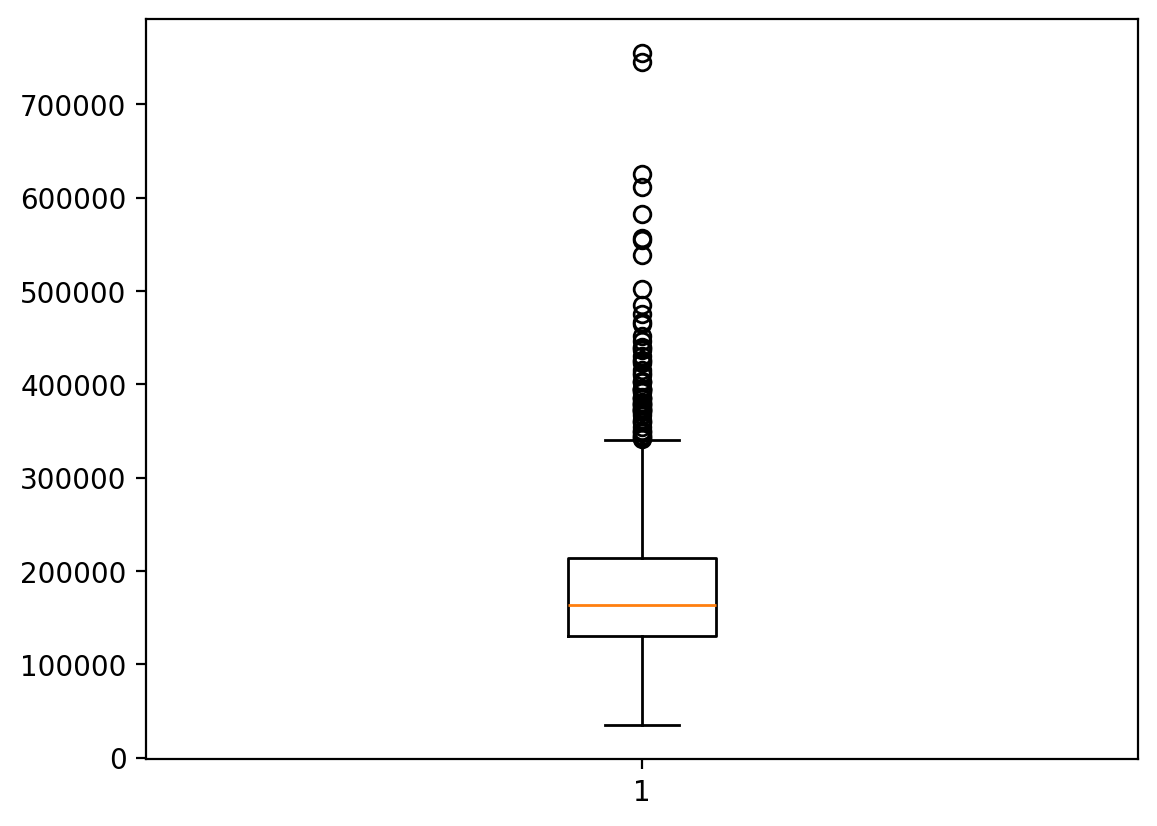

In [34]:
# 박스 플롯으로 기초 통계 분포 확인
plt.boxplot(df["SalePrice"])
plt.show()
# 일반적인 범위에서 벗어나는 값들이 존재
# 종속변수이므로 무조건 삭제나 대체하는게 아니고 상관관계가 높은 독립변수와의 관계를 확인후에 결정

(array([ 11.,  38.,  99., 232., 273., 218., 176., 104.,  93.,  58.,  42.,
         35.,  24.,  10.,  17.,   8.,   7.,   4.,   2.,   1.,   1.,   2.,
          1.,   0.,   2.,   0.,   0.,   0.,   0.,   2.]),
 array([ 34900.        ,  58903.33333333,  82906.66666667, 106910.        ,
        130913.33333333, 154916.66666667, 178920.        , 202923.33333333,
        226926.66666667, 250930.        , 274933.33333333, 298936.66666667,
        322940.        , 346943.33333333, 370946.66666667, 394950.        ,
        418953.33333333, 442956.66666667, 466960.        , 490963.33333333,
        514966.66666667, 538970.        , 562973.33333333, 586976.66666667,
        610980.        , 634983.33333333, 658986.66666667, 682990.        ,
        706993.33333333, 730996.66666667, 755000.        ]),
 <BarContainer object of 30 artists>)

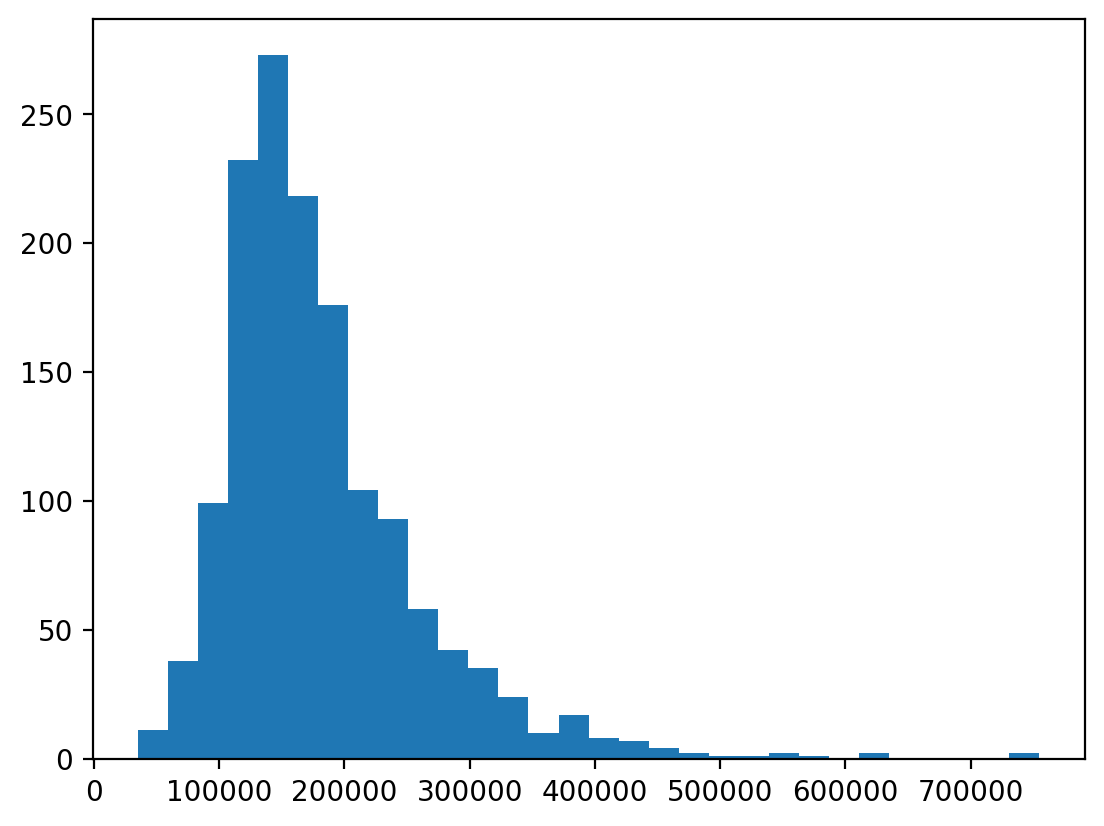

In [35]:
# 히스토그램 : 빈도수 확인
plt.hist(df["SalePrice"], bins=30)

<Axes: xlabel='SalePrice', ylabel='Density'>

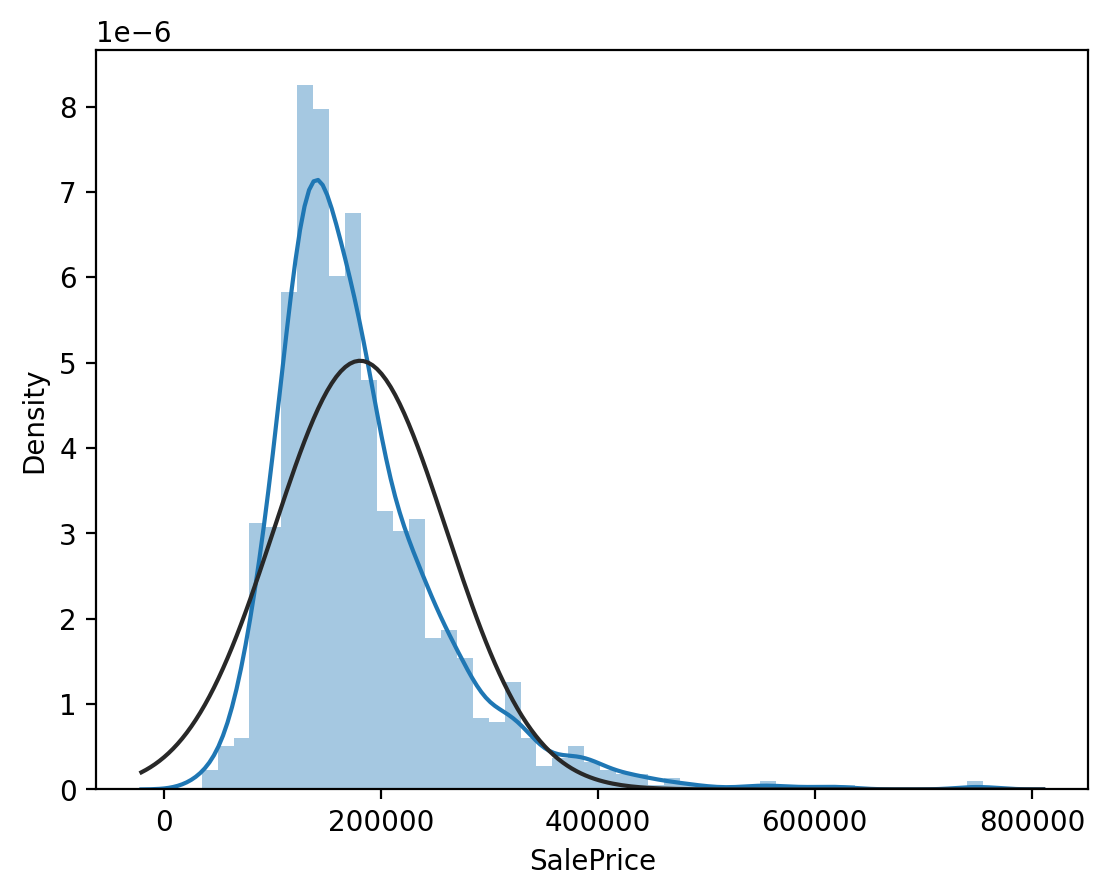

In [37]:
from scipy import stats
from scipy.stats import norm #science python 의 통계 패키지의 정규분포와 비슷한지 확인
# 확률 분포 확인
# 가장 가까운 정규 분포와 비교 
# 회귀분석(연속값 예측 알고리즘)은 거의 필수로 스케일링을 진행해야함
# >> 종속변수가 정규분포를 갖는다는 가정하에 생성된 알고리즘임
sns.distplot(df["SalePrice"], fit=stats.norm)

## 정규분포와 유사한지 확인  
- 데이터가 정규분포를 따르면 평균값, 분산 등을 예측하기 수월하기 때문에
- 정규분포에서 얼마나 벗어났는지 확인 
- skewness (왜도: 대칭성) 
- kurtosis (첨도: 끝부분의 모양)
- 왜도와 첨도 값들이 0에 가까울수록 정규분포와 유사 

<Axes: ylabel='Density'>

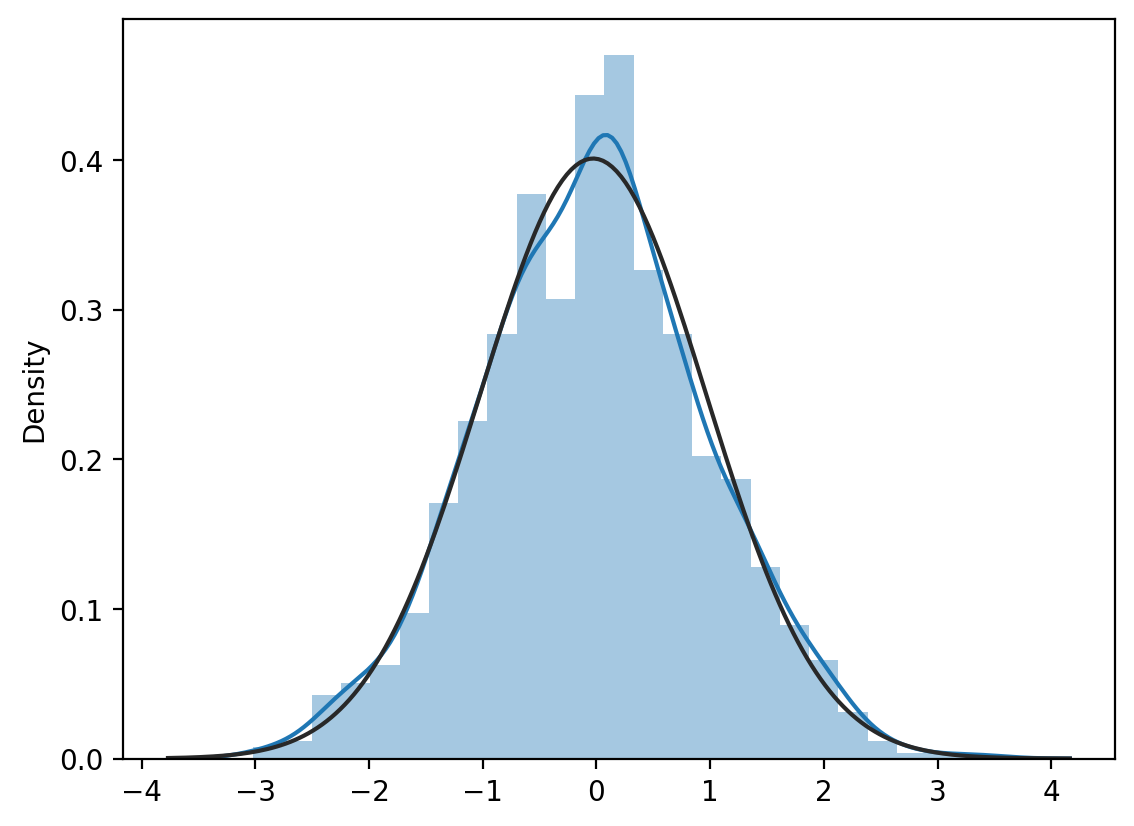

왜도 : 0.03137048063261363
첨도 : 0.0049237263631281


In [41]:
# 실제 정규분포인 경우의 왜도와 첨도 확인
x = np.random.randn(1000)
sns.distplot(x, fit=stats.norm)
plt.show()
print("왜도 :", stats.skew(x))
print("첨도 :", stats.kurtosis(x))

<Axes: xlabel='SalePrice', ylabel='Density'>

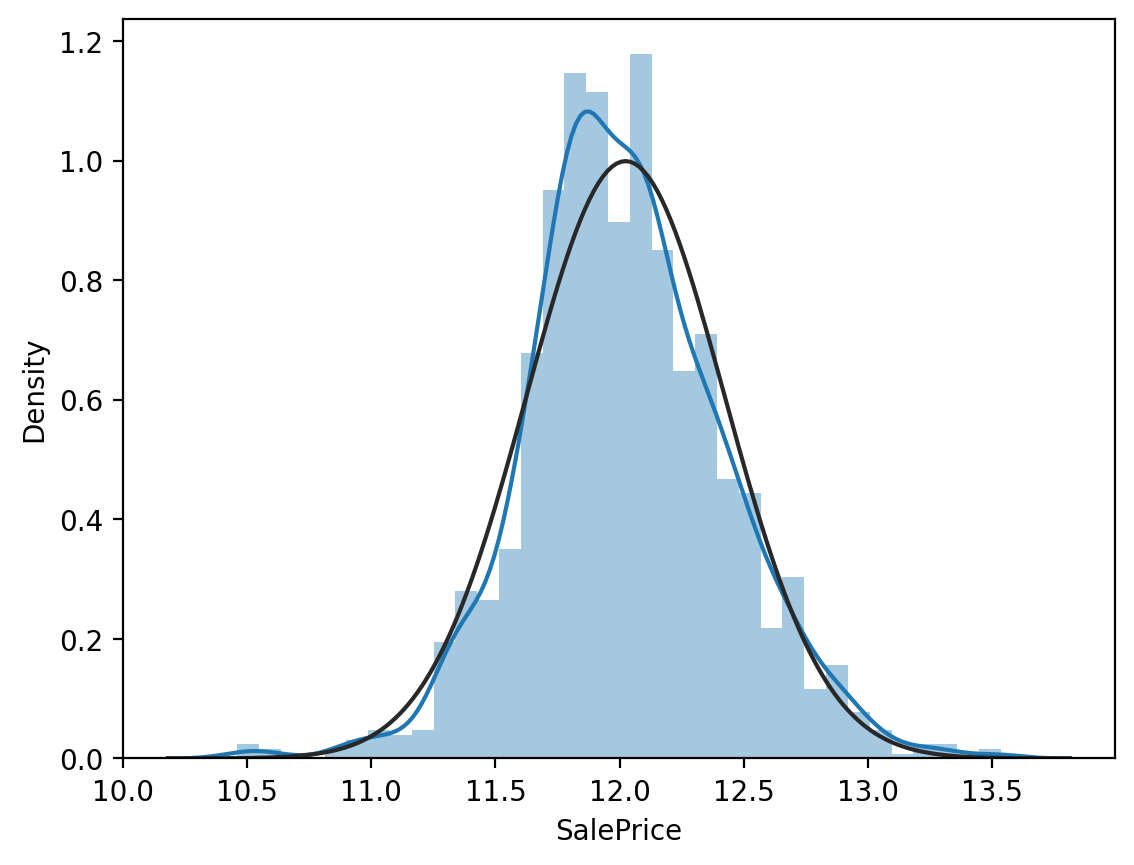

In [43]:
# 주택 가격은 왼쪽으로 치우져 있는 것 확인
# 정규분포와 유사하게 변환 -> 로그 변환 수행
# 일반적으로 정규분포에서 벗어나 있는 경우 로그 변환 수행 
sns.distplot(np.log1p(df["SalePrice"]), fit=stats.norm)
plt.show()


In [44]:
# 주택 가격의 왜도/첨도 확인 
# 로그변환 전
print("왜도 :", stats.skew(df["SalePrice"]))
print("첨도 :", stats.kurtosis(df["SalePrice"]))

# 로그변환 후
print("왜도 :", stats.skew(np.log1p(df["SalePrice"])))
print("첨도 :", stats.kurtosis(np.log1p(df["SalePrice"])))

왜도 : 1.880940746034036
첨도 : 6.509812011089439
왜도 : 0.12122191311528363
첨도 : 0.8026427107468055


1. 이상치로 보이는 data(SalePrice)가 있음
    - 이상치 확인 결과, boxplot 상 이상치 다수 존재. 처리 필요
    - 단 상관성이 높은 다른 독립변수와 관계 파악 후 처리
2. 정규분포를 따르지 않고 있으므로 로그변환 적용

## 목적변수(타겟 변수)와 다른 입력 변수(피처)들 과의 관계 확인  
- 상관관계 확인 (상관계수)

- 데이터 분석은 입력 변수를 사용하여 목적 변수를 예측하는 작업  
- 각 입력 변수와 목적 변수 사이의 상관계수를 보면 데이터의 연관성을 파악하는데 도움이 됨  
- 절대적이진 않음  
    - 예: 중고차 가격(타겟 변수) : 연식(입력 변수)이 오래되면 가격이 떨어짐
---
- 입력 변수(input)의 다른 이름
  - 특성 (features)
  - 설명 변수 (explanatory variable)
  - 독립 변수 (independent variable)
- 목적 변수(target variable) 의 다른 이름
  - 레이블 (label)
  - 출력 변수 (output)
  - 종속 변수 (dependent variable)

### 히트맵으로 상관관계 파악 

In [46]:
# 주의! - 열의 데이터 타입이 문자(object)인 열들은 제거
object_cols = df.select_dtypes(include=["object"]).columns
new_df = df.drop(columns=object_cols)
new_df.shape
new_df.info()

(1460, 37)

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 37 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   LotFrontage    1201 non-null   float64
 2   LotArea        1460 non-null   int64  
 3   OverallQual    1460 non-null   int64  
 4   OverallCond    1460 non-null   int64  
 5   YearBuilt      1460 non-null   int64  
 6   YearRemodAdd   1460 non-null   int64  
 7   MasVnrArea     1452 non-null   float64
 8   BsmtFinSF1     1460 non-null   int64  
 9   BsmtFinSF2     1460 non-null   int64  
 10  BsmtUnfSF      1460 non-null   int64  
 11  TotalBsmtSF    1460 non-null   int64  
 12  1stFlrSF       1460 non-null   int64  
 13  2ndFlrSF       1460 non-null   int64  
 14  LowQualFinSF   1460 non-null   int64  
 15  GrLivArea      1460 non-null   int64  
 16  BsmtFullBath   1460 non-null   int64  
 17  BsmtHalfBath   1460 non-null   int64  
 18  FullBath     

In [47]:
# 상관관계 매트릭스 출력 
new_df_corr_mat = new_df.corr()
new_df_corr_mat.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856


<Figure size 1200x900 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Feature Correlation Heatmap')

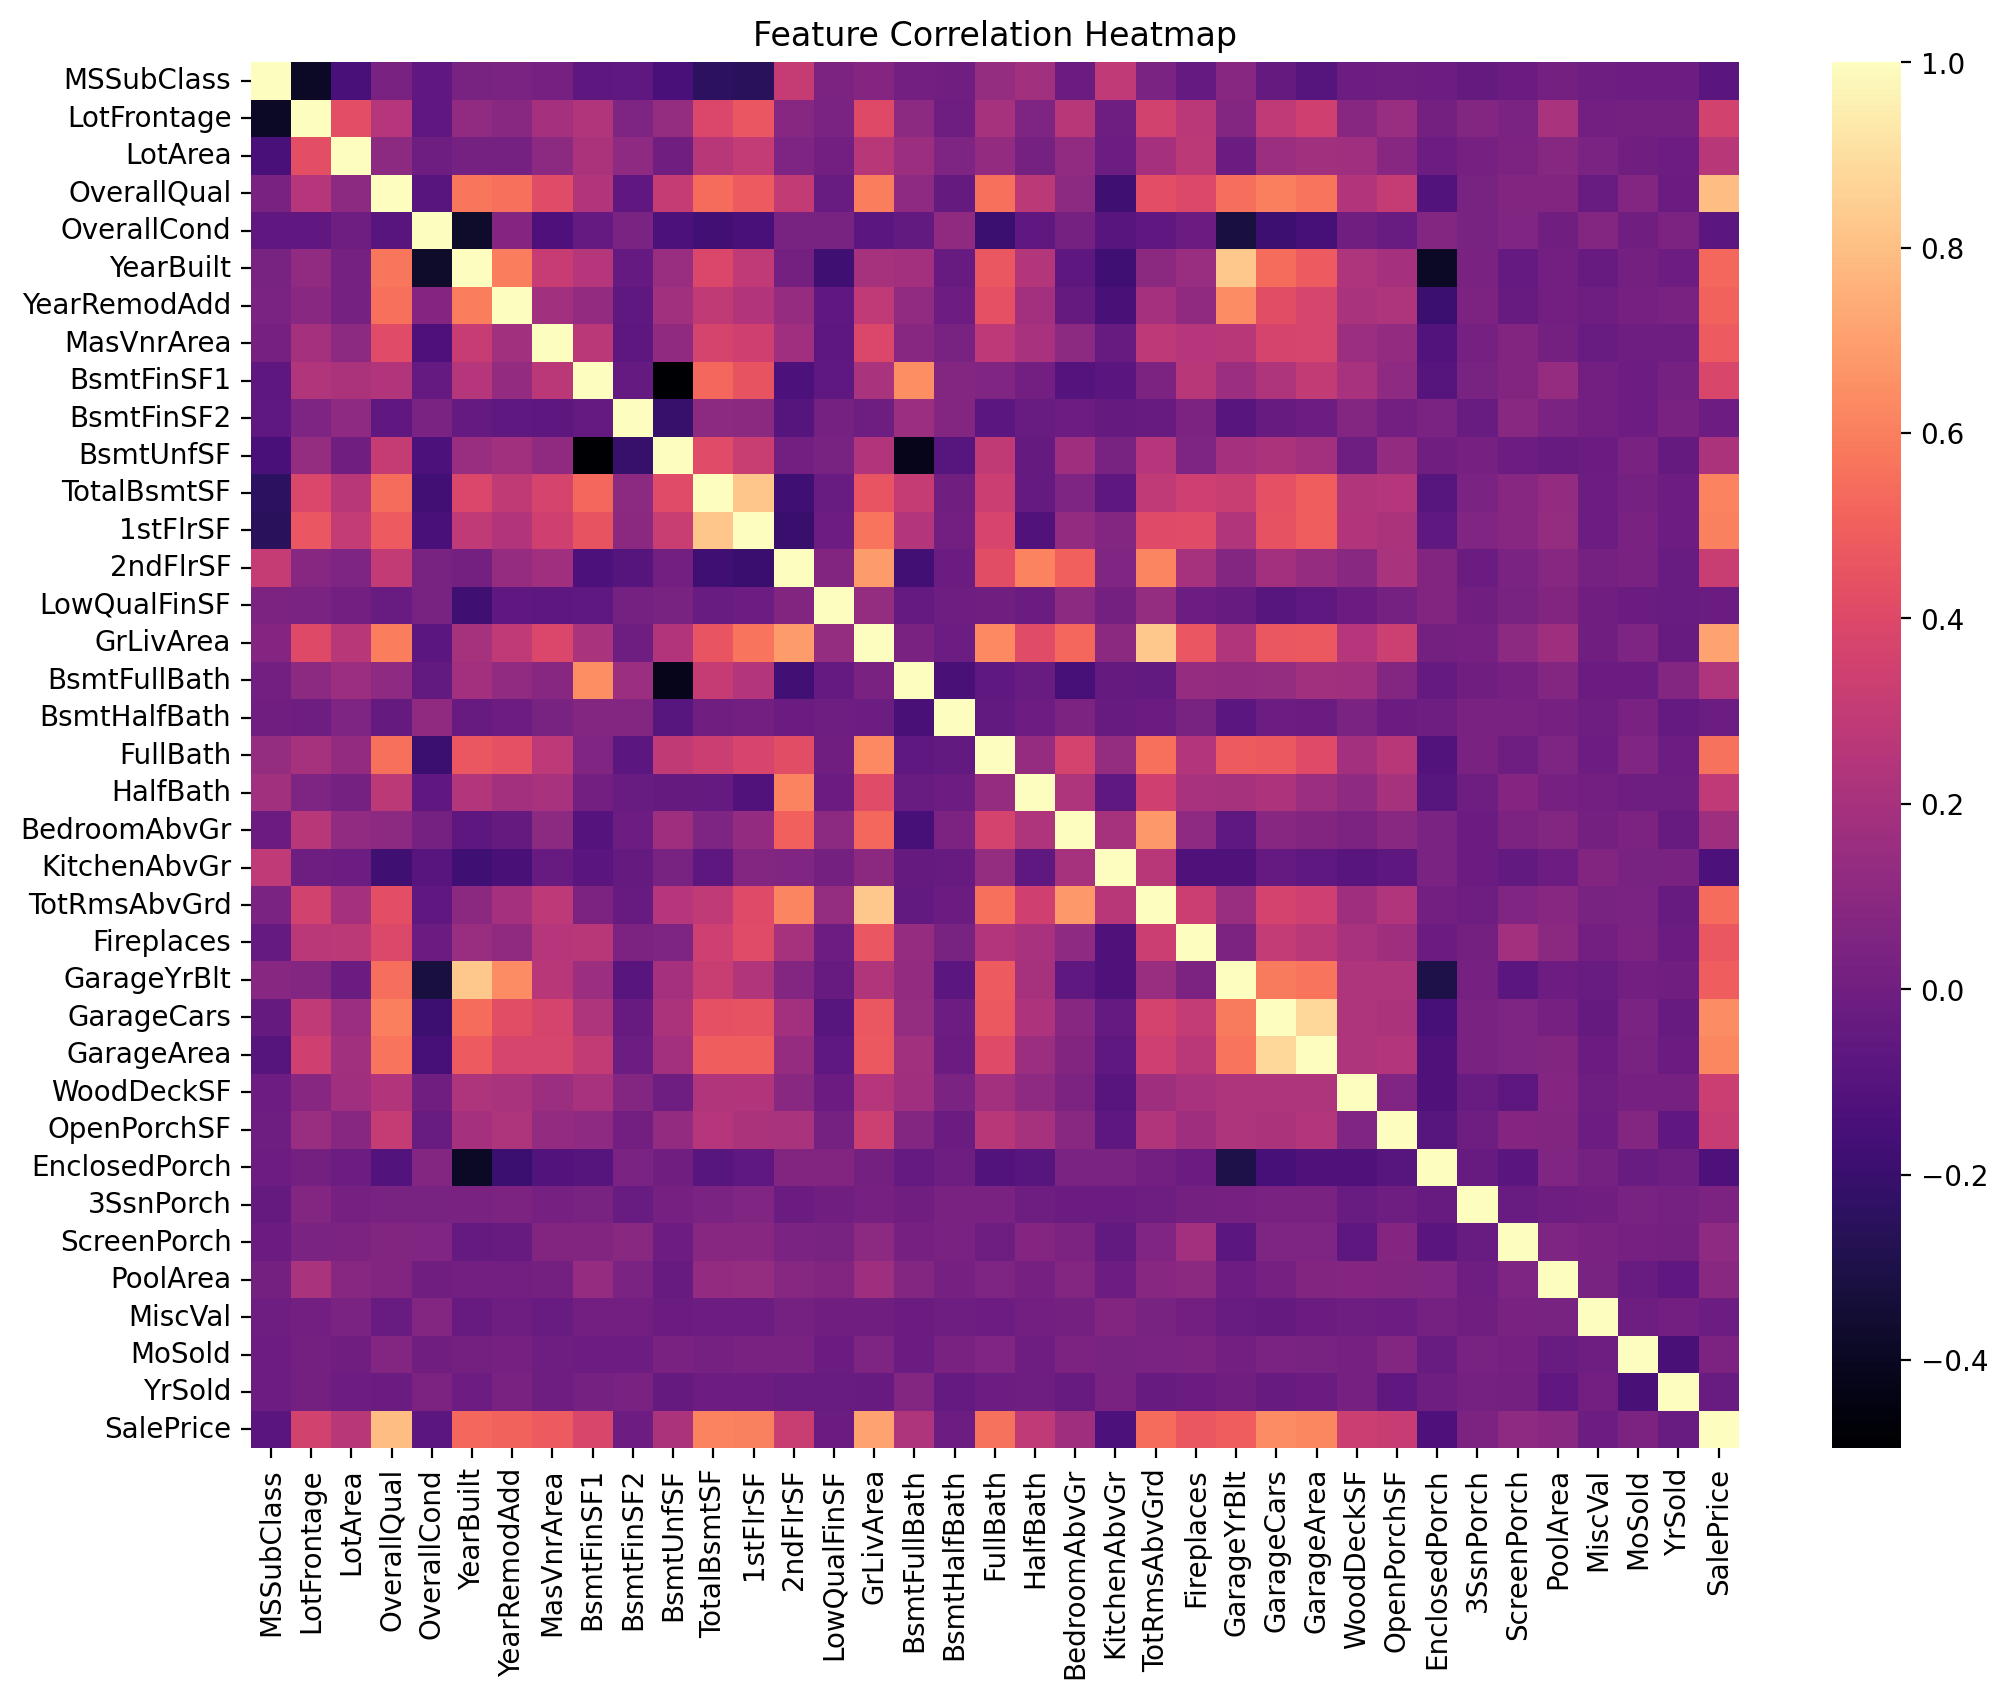

In [52]:
# 상관관계 매트릭스를 heatmap으로 표시 
plt.figure(figsize=(12, 9))
sns.heatmap(new_df_corr_mat, cmap="magma", cbar=True)  
plt.title("Feature Correlation Heatmap")
plt.show()

In [53]:
# SalePrice가 맨 아래행에 있으므로 tail()로 실제 상관계수 확인
new_df_corr_mat.tail()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
PoolArea,0.008283,0.206167,0.077672,0.065166,-0.001985,0.004950,0.005829,0.011723,0.140491,0.041709,...,0.073378,0.060762,0.054203,-0.007992,0.051307,1.000000,0.029669,-0.033737,-0.059689,0.092404
MiscVal,-0.007683,0.003368,0.038068,-0.031406,0.068777,-0.034383,-0.010286,-0.029815,0.003571,0.004940,...,-0.009551,-0.018584,0.018361,0.000354,0.031946,0.029669,1.000000,-0.006495,0.004906,-0.021190
MoSold,-0.013585,0.011200,0.001205,0.070815,-0.003511,0.012398,0.021490,-0.005965,-0.015727,-0.015211,...,0.021011,0.071255,-0.028887,0.029474,0.023217,-0.033737,-0.006495,1.000000,-0.145721,0.046432
YrSold,-0.021407,0.007450,-0.014261,-0.027347,0.043950,-0.013618,0.035743,-0.008201,0.014359,0.031706,...,0.022270,-0.057619,-0.009916,0.018645,0.010694,-0.059689,0.004906,-0.145721,1.000000,-0.028923
SalePrice,-0.084284,0.351799,0.263843,0.790982,-0.077856,0.522897,0.507101,0.477493,0.386420,-0.011378,...,0.324413,0.315856,-0.128578,0.044584,0.111447,0.092404,-0.021190,0.046432,-0.028923,1.000000


In [56]:
# SalePrice와 상관관계가 높은 변수 10개 추출 - 양수 : 집값을 높이는데에 관여하는 독립변수로 추정
new_df_corr_mat.loc["SalePrice"].drop("SalePrice").sort_values(ascending=False).head(10)
# SalePrice와 상관관계가 높은 변수 10개 추출  
# - 음수 : 집값을 내리는데에 관여하는 독립변수로 추정
# 단, 상관관계가 절대값 0.13이 제일 큰 값이므로 음의 상관관계를 가진 변수들은 집값에 큰 영향이 없다고 판단 가능
# 상황에 따라서 무시해도 됨(독립변수의 양에 따라 제거도 가능할 정도)
new_df_corr_mat.loc["SalePrice"].drop("SalePrice").sort_values(ascending=True).head(10)

OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64

KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
MSSubClass      -0.084284
OverallCond     -0.077856
YrSold          -0.028923
LowQualFinSF    -0.025606
MiscVal         -0.021190
BsmtHalfBath    -0.016844
BsmtFinSF2      -0.011378
3SsnPorch        0.044584
Name: SalePrice, dtype: float64

Index(['KitchenAbvGr', 'EnclosedPorch', 'MSSubClass', 'OverallCond', 'YrSold',
       'LowQualFinSF', 'MiscVal', 'BsmtHalfBath', 'BsmtFinSF2', '3SsnPorch'],
      dtype='object')

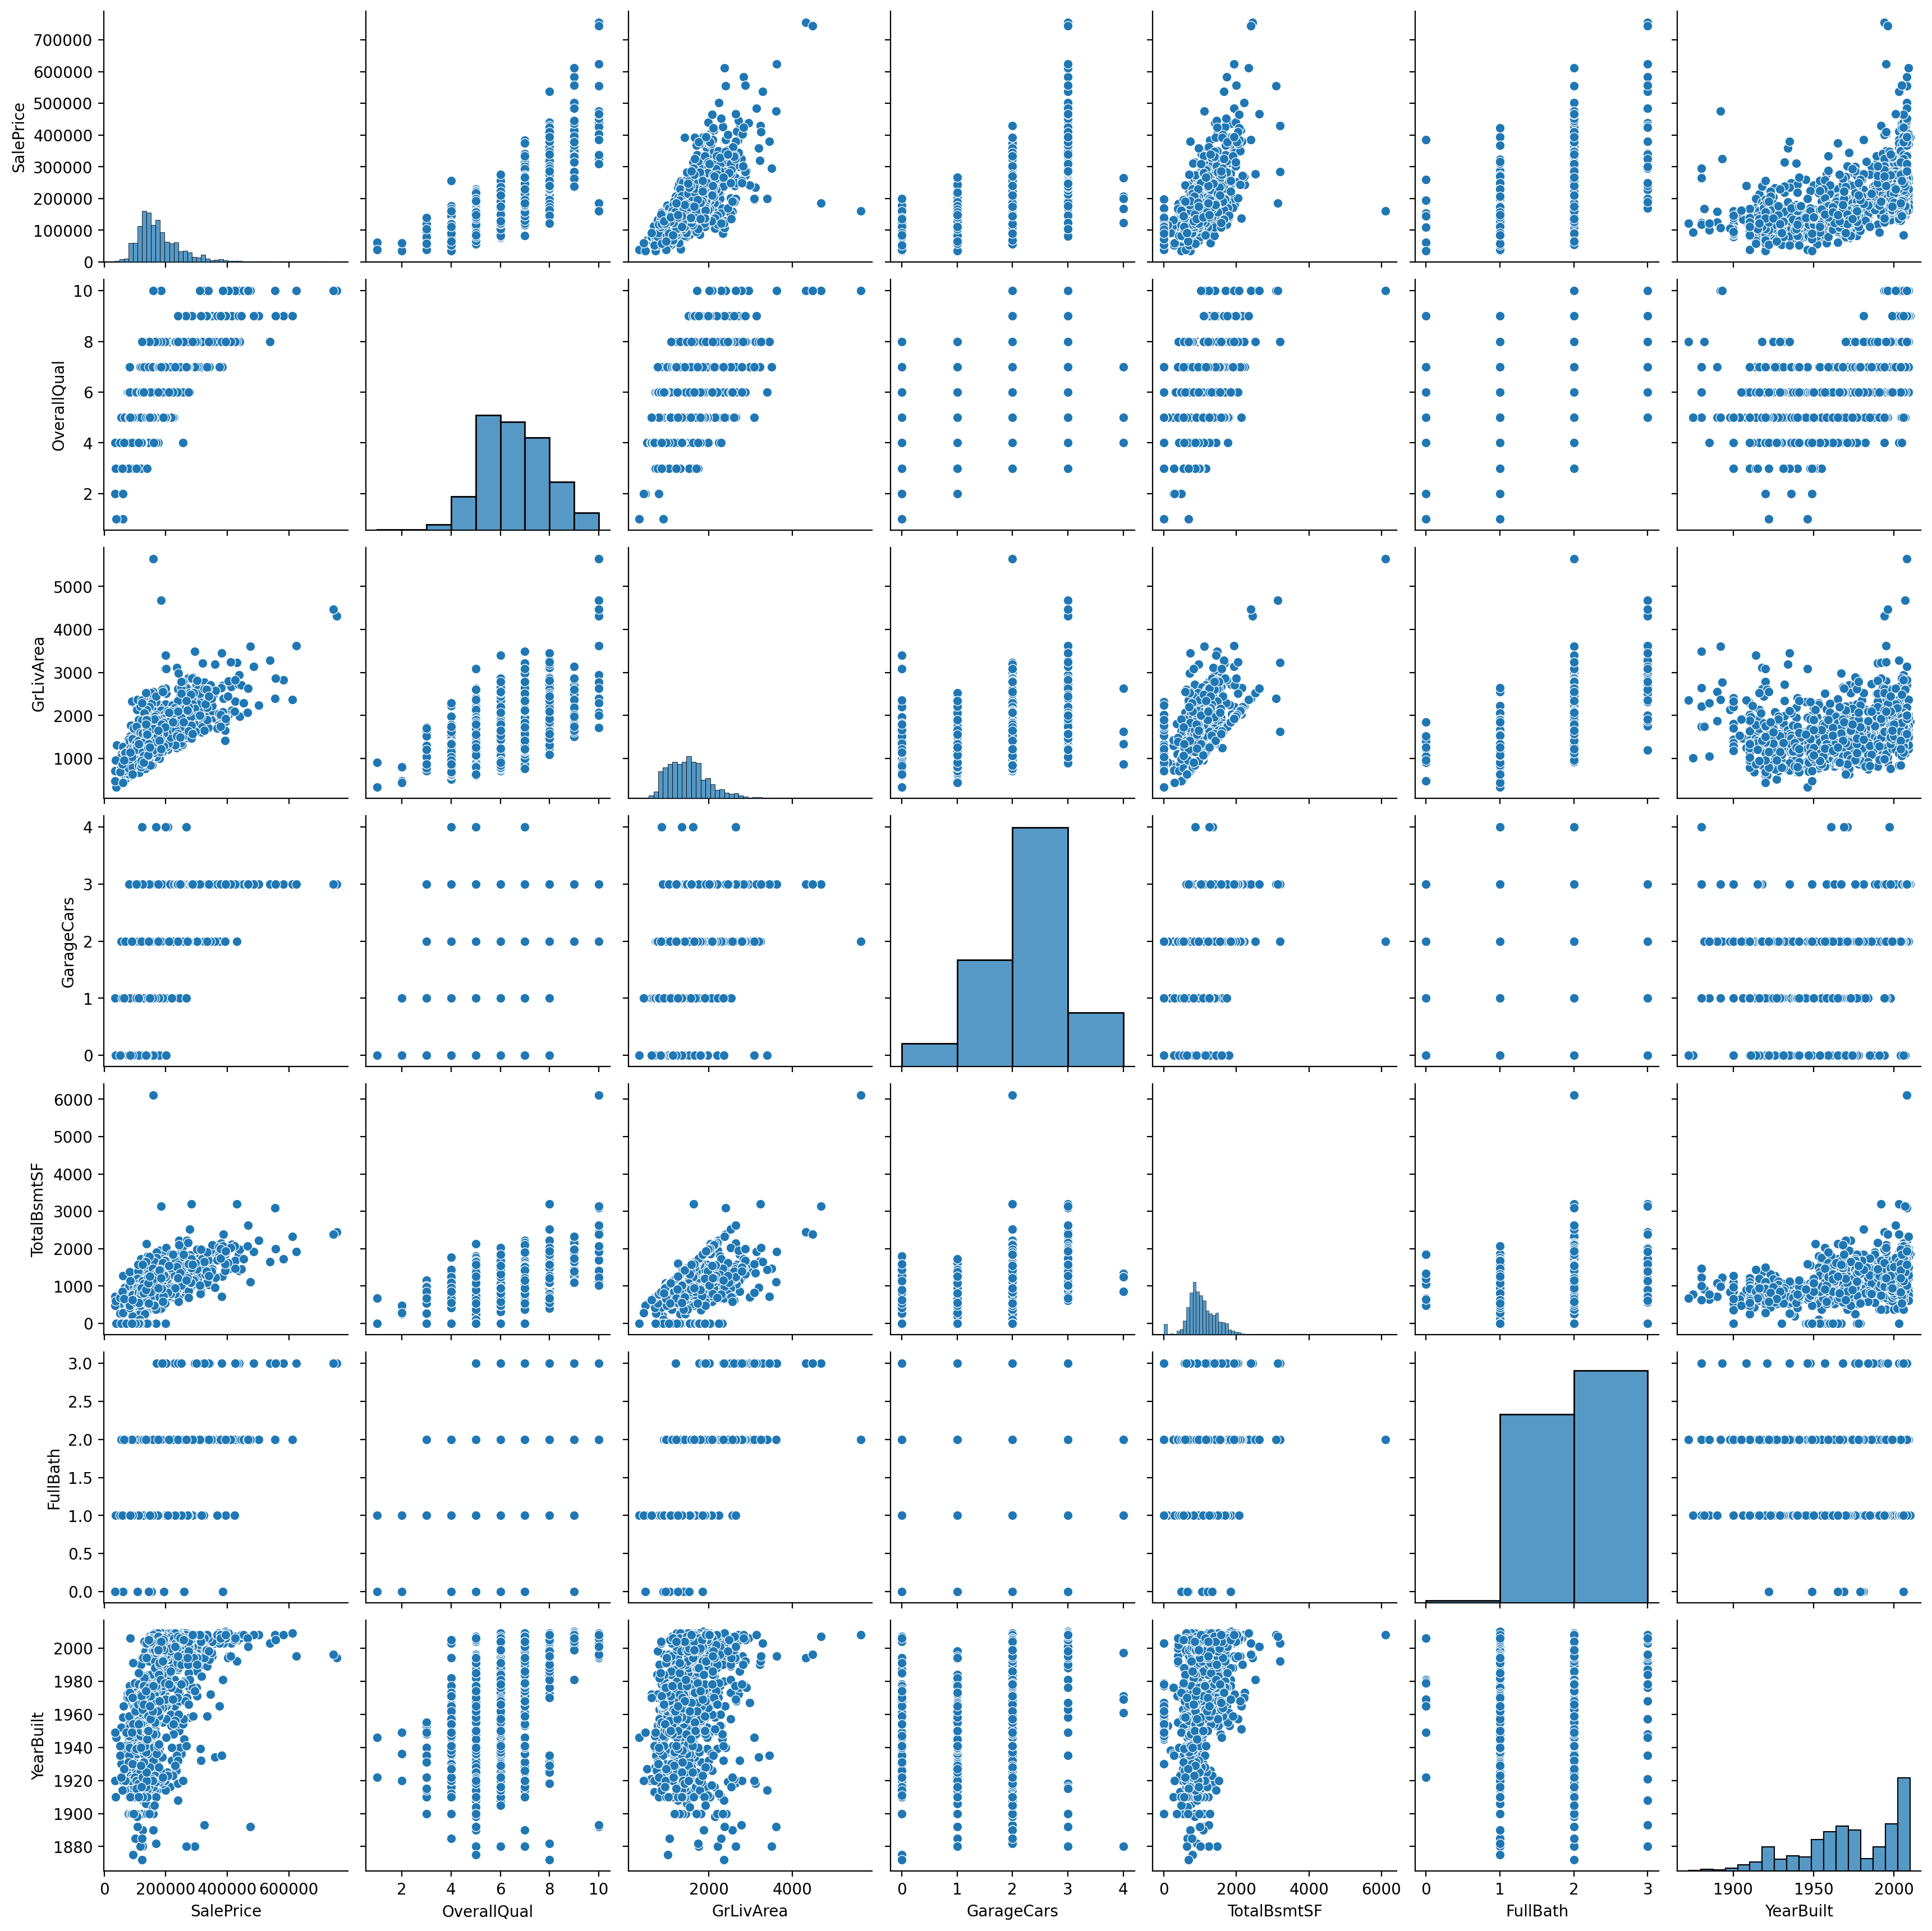

In [61]:
# pairplot() 사용해서 상관관계 확인
# top10_df.index
# new_df_corr_mat
# sns.pairplot(df[top10_df.index])
new_df_corr_mat.loc["SalePrice"].drop("SalePrice").sort_values(ascending=True).head(10).index
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars',
       'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df[cols])
plt.show()


In [62]:
# 대각선 위아래는 축만 바뀐거니까 한쪽만 확인
# 선형적인 관계로 보이는 그래프 찾아서 확인
# 선형성 : 한 축 값이 증가하면 다른 축의 값도 증가/감소 경향을 보이는 그래프(상관관계 있음)
# 그래프 첫행의 세번째 그래프와 다섯번째 그래프가 더 선형적인 것으로 보임
# 첫행의 두번재 그래프도 우상향하고 있지만 그래프가 한줄로 듬성듬성 나타나는 것을 보면 독립변수가 범주형일것으로 판단됨
# 컬럼의 의미상 주택면적이 일반적으로 주택가격에 영향을 미친다고 볼 수 있으므로 두번째 그래프의 변수인 GrLivArea 컬럼과 관계를 자세히 살펴볼 필요가 있다.

### 산포도 확인
- 두 변수 사이의 관계 파악
    - SalePrice(가격) -- GrLivArea(면적)

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

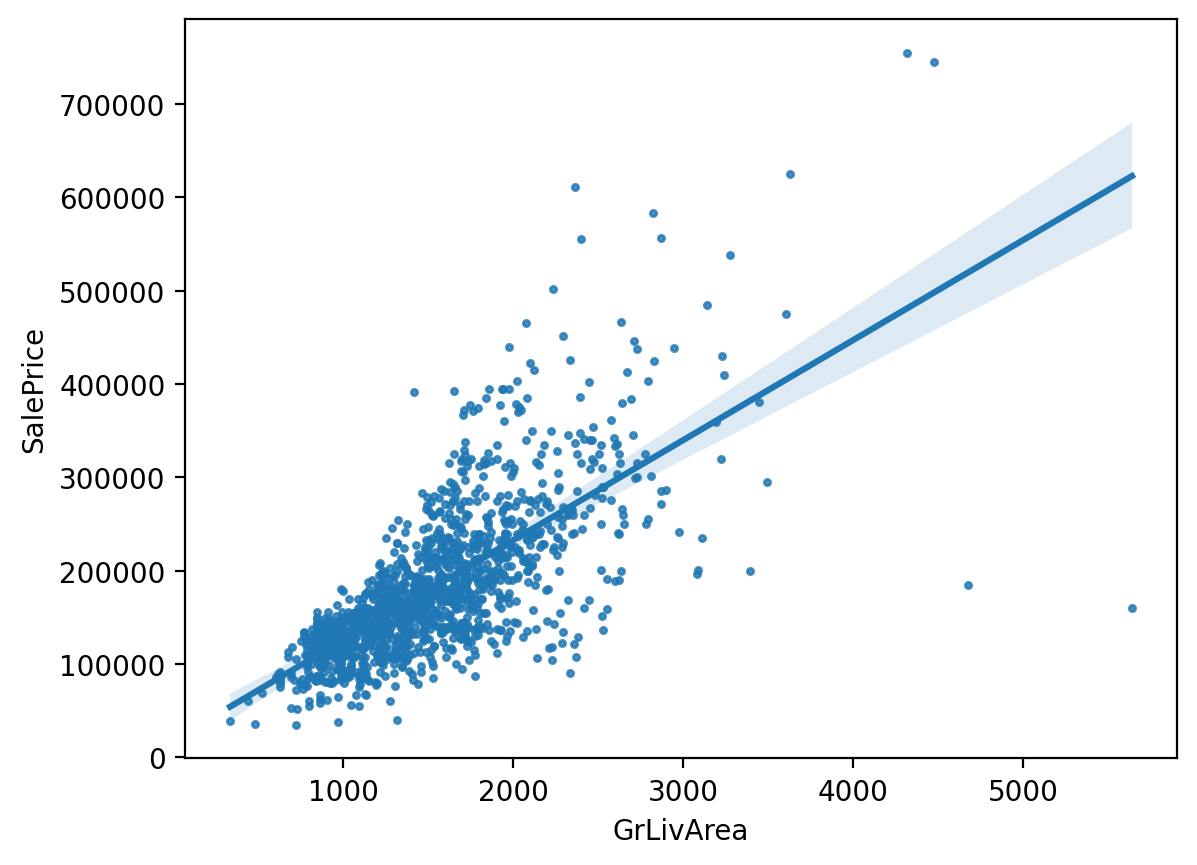

In [66]:
# plt.scatter(df["GrLivArea"], df["SalePrice"], s=5)
sns.regplot(x=df["GrLivArea"], y=df["SalePrice"], scatter_kws={"s": 5})
plt.show()

# 오른쪽 하단의 두 값은 면적에 비해 너무 낮은 가격 >> 이상치로 간주
# 상단의 두 값은 선상에 존재하는 것으로 유추

### 카테고리 특성과의 관계 확인 
- sns 박스플롯으로 보기

In [67]:
# 범주형 변수인 OverallQual 확인
df["OverallQual"].unique()

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2])

<Axes: xlabel='OverallQual', ylabel='SalePrice'>

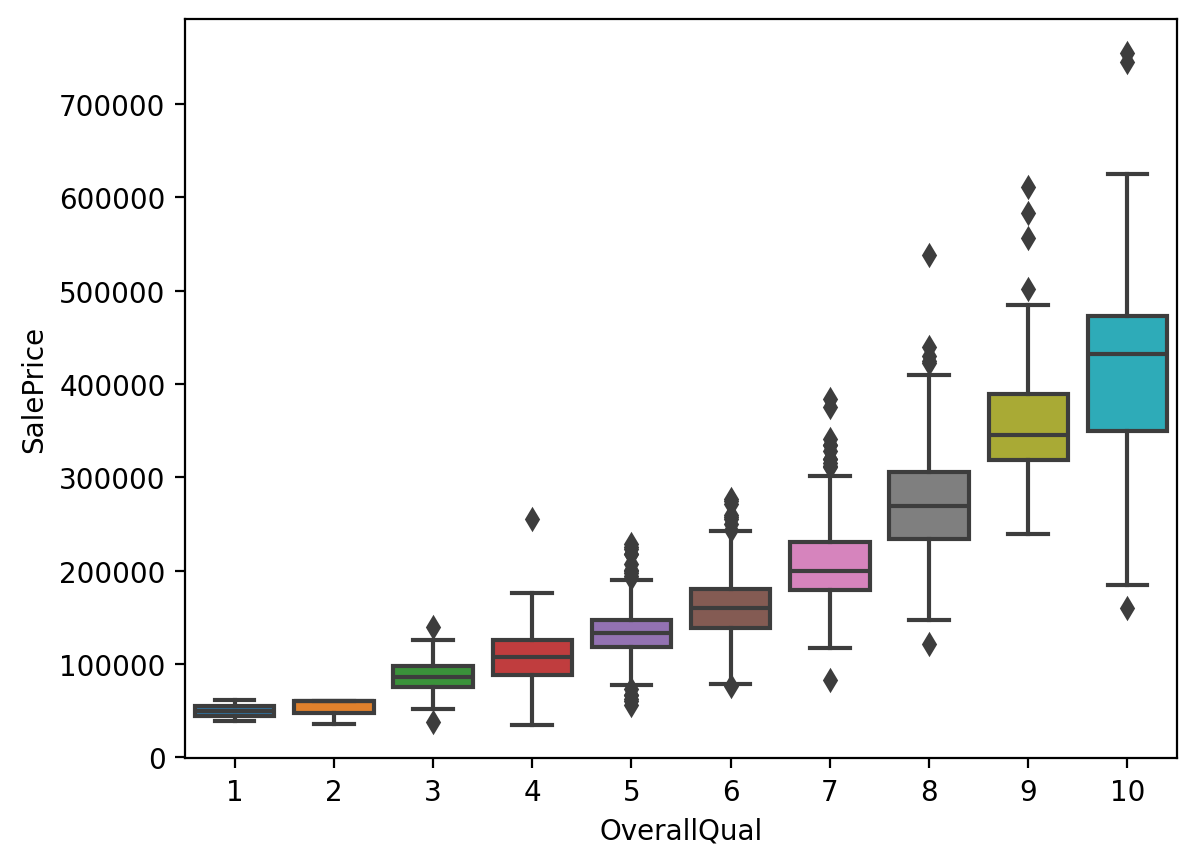

In [71]:
# boxplot으로 범주형 변수인 OverallQual 확인
sns.boxplot(x="OverallQual", y="SalePrice", data=df)
plt.show()
# 총점/평점이 높을수록 가격이 높은곳에 분포됨

In [76]:
df[["YearBuilt", "SalePrice"]].corr()

,YearBuilt,SalePrice
YearBuilt,1.000000,0.522897
SalePrice,0.522897,1.000000


<Figure size 2000x800 with 0 Axes>

<Axes: xlabel='YearBuilt', ylabel='SalePrice'>

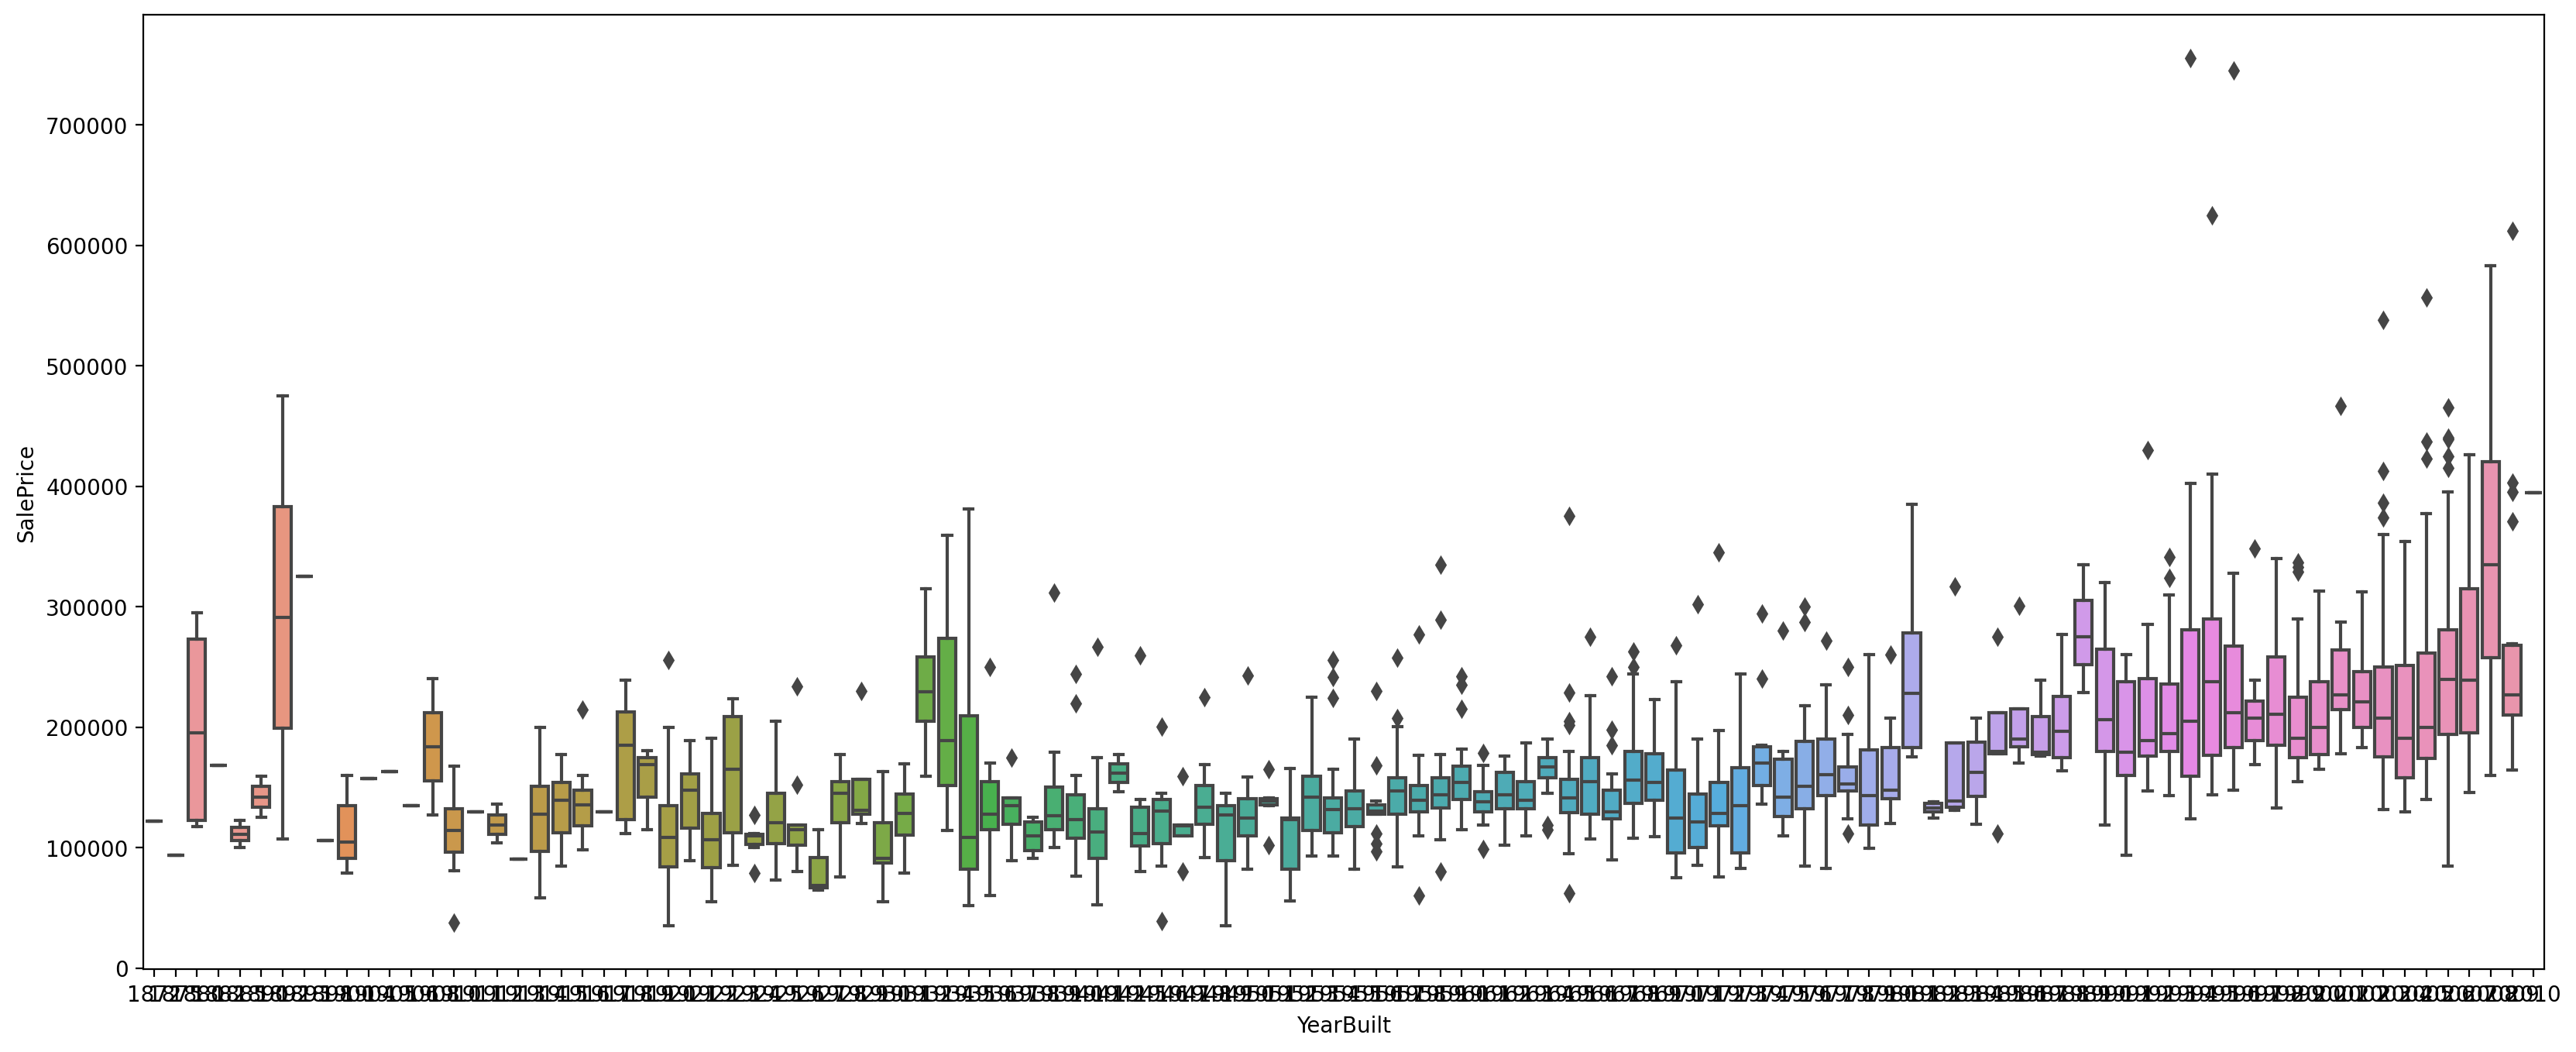

In [77]:
# 범주형 변수인 YearBuilt의 영향 확인
plt.figure(figsize=(20, 8))
sns.boxplot(x="YearBuilt", y="SalePrice", data=df)
plt.show()
# 연도별로 확인 결과 점층적 오름세이긴 하나 영향이 크진 않은것으로 보임
# 특정년도에 다른 이슈로 집값이 폭등한 지점이 보임

## 이상치  확인

In [79]:
df = data.copy()
df.shape

(1460, 80)

<Axes: xlabel='SalePrice', ylabel='Density'>

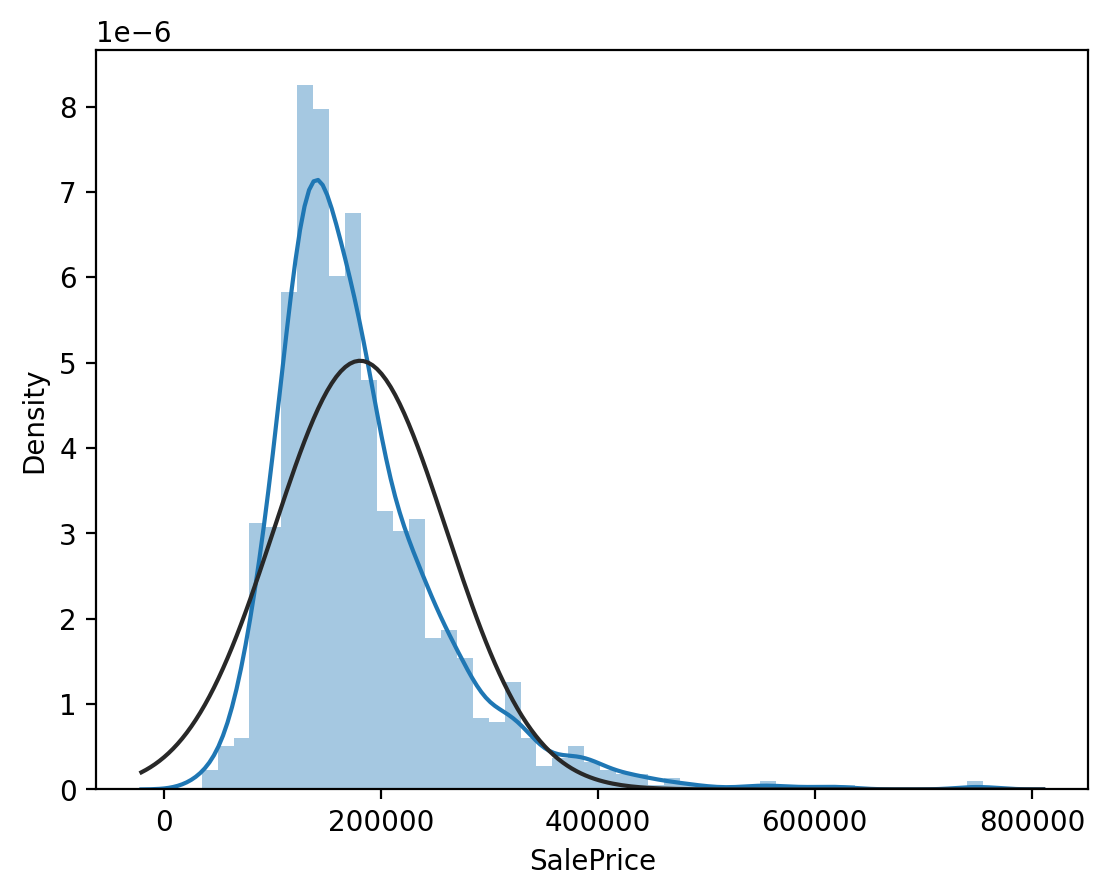

np.int64(755000)

In [82]:
# 주택 가격 데이터를 distplot()으로 그려서 이상치 확인
from scipy import stats
sns.distplot(df["SalePrice"], fit=stats.norm)
plt.show()
df["SalePrice"].max()

In [83]:
# 주택 가격에 표준 스케일링 적용 후 
from sklearn.preprocessing import StandardScaler 
# 1. 객체 생성
sScaler = StandardScaler()
# 2. 표준스케일링 진행 후, 열에 추가
df["SalePrice_sc"] = sScaler.fit_transform(df[["SalePrice"]])
df.head(3)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,SalePrice_sc
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,0.347273
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,0.007288
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,0.536154


In [86]:
# 스케일링 한 주택 가격으로 상위10 추출
df.sort_values(by = "SalePrice_sc", ascending=False)["SalePrice_sc"].head(10)

Id
692     7.228819
1183    7.102899
1170    5.591855
899     5.423840
804     5.062146
1047    4.730321
441     4.710413
770     4.496348
179     4.040982
799     3.828970
Name: SalePrice_sc, dtype: float64

In [87]:
# 스케일링 한 주택 가격으로 하위10 추출
df.sort_values(by = "SalePrice_sc", ascending=False)["SalePrice_sc"].tail(10)

Id
813    -1.573100
706    -1.585604
1326   -1.585604
1338   -1.617084
711    -1.623380
31     -1.774484
534    -1.783299
969    -1.800928
917    -1.833528
496    -1.838704
Name: SalePrice_sc, dtype: float64

<Axes: ylabel='SalePrice_sc'>

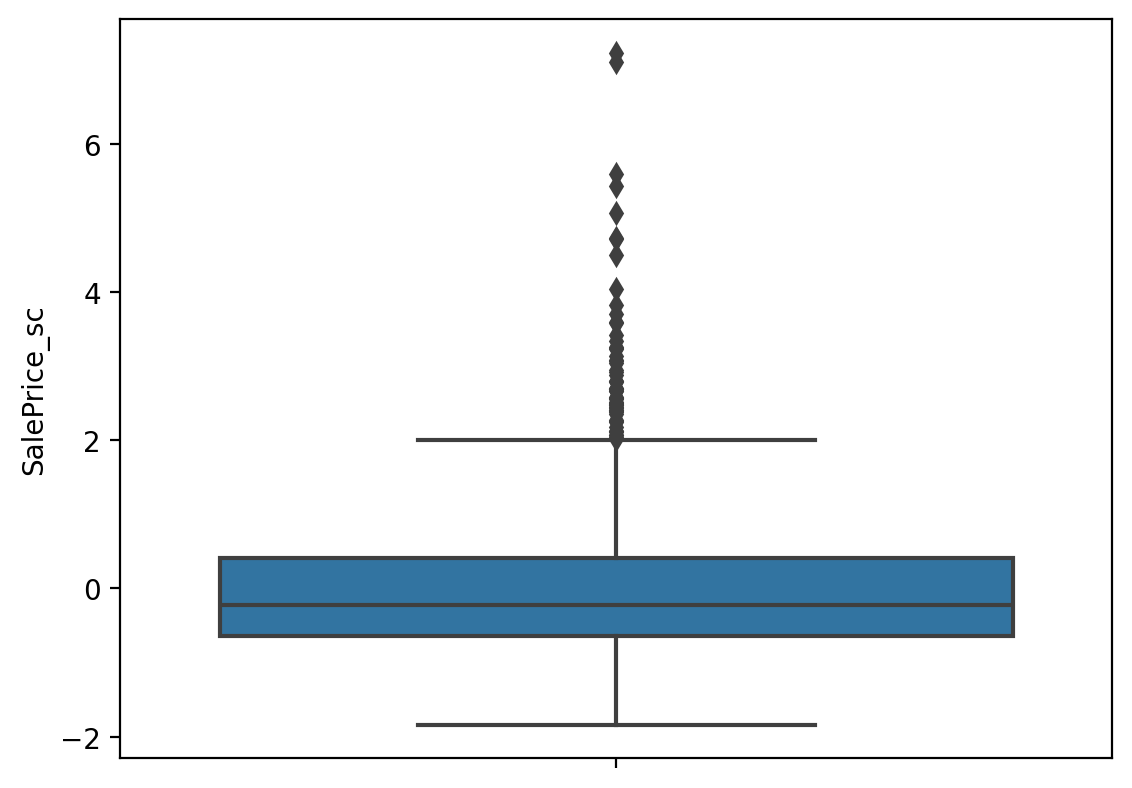

In [100]:
# 스케일링한 주택 가격으로 boxplot() 그려서 확인
sns.boxplot(y=df["SalePrice_sc"])
plt.show()

<Axes: xlabel='SalePrice', ylabel='Density'>

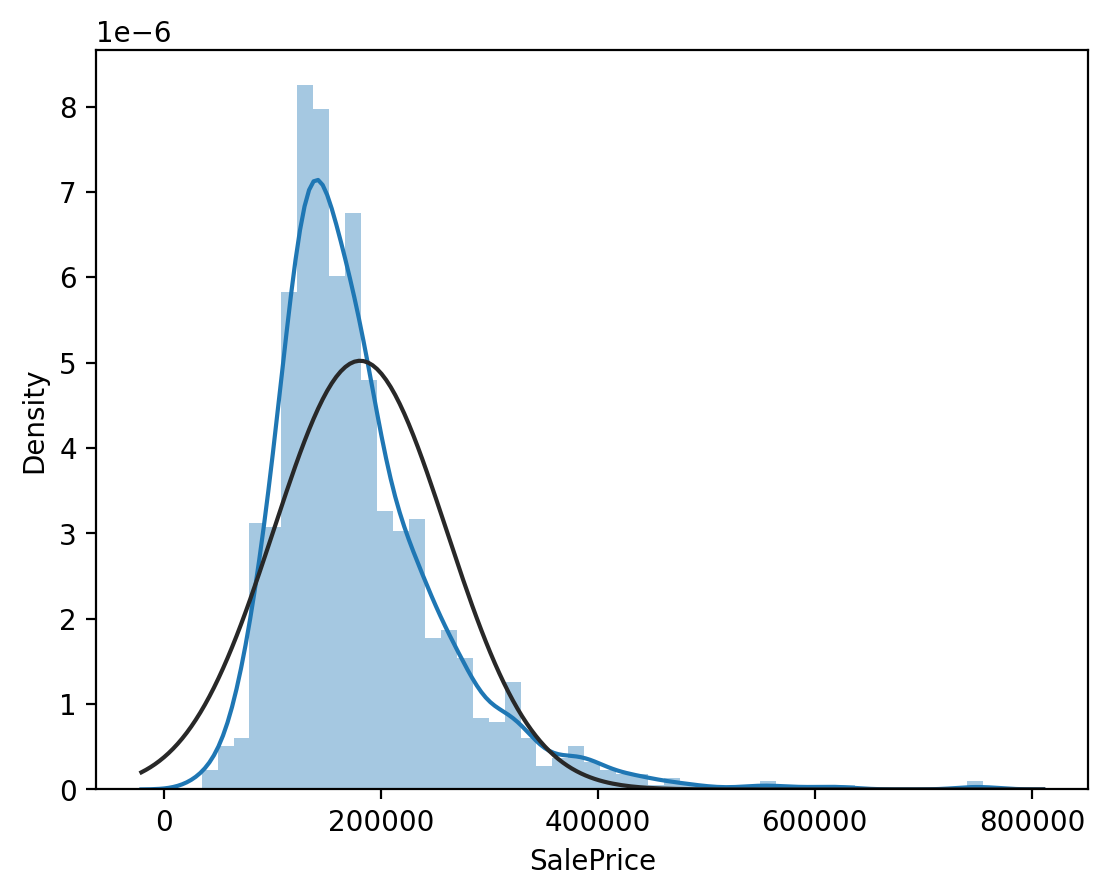

In [89]:
# 로그 변환 전 주택 가격
sns.distplot(df["SalePrice"], fit=stats.norm)
plt.show()

<Axes: xlabel='SalePrice_log', ylabel='Density'>

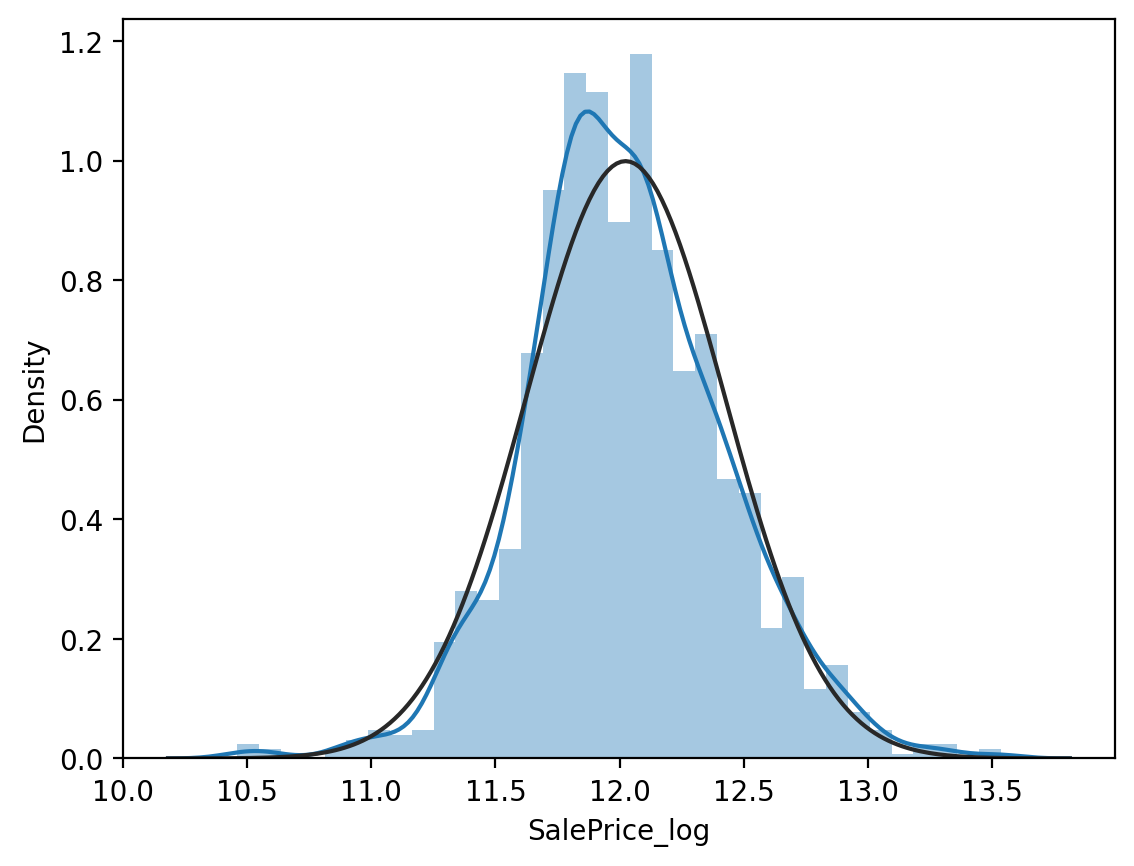

In [92]:
# 로그 변환 후 확인
# 반드시 로그 변환을 해야 하는 것은 아니지만
# 정규분포에 가까우면 예측하기가 수월하기 때문에 로그변혼 수행
df["SalePrice_log"] = np.log1p(df["SalePrice"])
sns.distplot(df["SalePrice_log"], fit=stats.norm)
plt.show()

In [95]:
# 종속변수 SalePrice에 이상치 data를 확인했고, 
# 이상치 data를 그냥 사용하되, 처리해서 이상치가 아닌 데이터로 구성
# 1. log변환 >> 2. 표준스케일링변환 진행
df["SalePrice_log_sc"] = sScaler.fit_transform(df[["SalePrice_log"]])
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,SalePrice_sc,SalePrice_log,SalePrice_log_sc
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,0,2,2008,WD,Normal,208500,0.347273,12.247699,0.560067
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,NaN,0,5,2007,WD,Normal,181500,0.007288,12.109016,0.212763
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,NaN,0,9,2008,WD,Normal,223500,0.536154,12.317171,0.734046
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,NaN,0,2,2006,WD,Abnorml,140000,-0.515281,11.849405,-0.437383
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,NaN,0,12,2008,WD,Normal,250000,0.869843,12.429220,1.014651
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,0,8,2007,WD,Normal,175000,-0.074560,12.072547,0.121433
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,0,2,2010,WD,Normal,210000,0.366161,12.254868,0.578019
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,Shed,2500,5,2010,WD,Normal,266500,1.077611,12.493133,1.174709


In [96]:
# SalePrice_log_sc 값으로 상위10 확인
df.sort_values(by="SalePrice_log_sc", ascending=False)["SalePrice_log_sc"].head(10)

Id
692     3.782544
1183    3.749153
1170    3.309316
899     3.255273
804     3.134818
1047    3.018970
441     3.011846
770     2.933939
179     2.759682
799     2.674219
Name: SalePrice_log_sc, dtype: float64

In [98]:
# SalePrice_log_sc 하위10 확인
df.sort_values(by="SalePrice_log_sc", ascending=True)["SalePrice_log_sc"].head(10)

Id
496    -3.916198
917    -3.886879
969    -3.709688
534    -3.618851
31     -3.574638
711    -2.917613
1338   -2.893649
706    -2.777150
1326   -2.777150
813    -2.732340
Name: SalePrice_log_sc, dtype: float64

<Axes: ylabel='SalePrice_log_sc'>

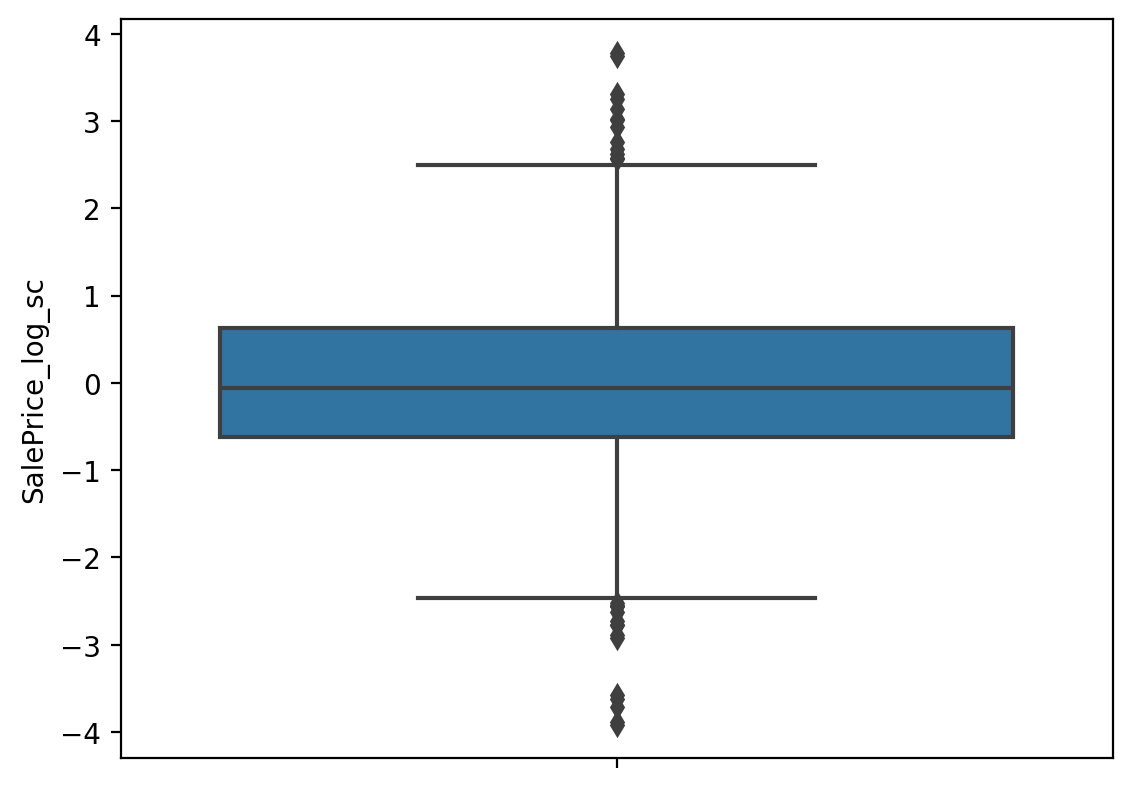

In [99]:
# 로그변환 후 스케일링한 주택 가격으로 boxplot() 그려서 확인
sns.boxplot(y=df["SalePrice_log_sc"])
plt.show()

### 화폐와 관계있는 변수
- 가중치가 상대적인 의미가 있을 수 있는 변수들은 보통 로그변환을 진행하면 설명력이나 예측력이 좋아진다.

### 종속변수에 이상치로 생각했던 2개의 데이터를 변환(로그변환, 스케일링)을 통해 일반데이터로 대체
- 이상치 2개 데이터가 일반데이터와 크게 차이나지 않게 변환

#### 독립변수 GrLivArea의 이상치를 제거
- 면적에 비해 가격이 너무 낮게 생성됨
- 추세와 맞지 않는 하단의 2개 데이터는 제거하기로 결정

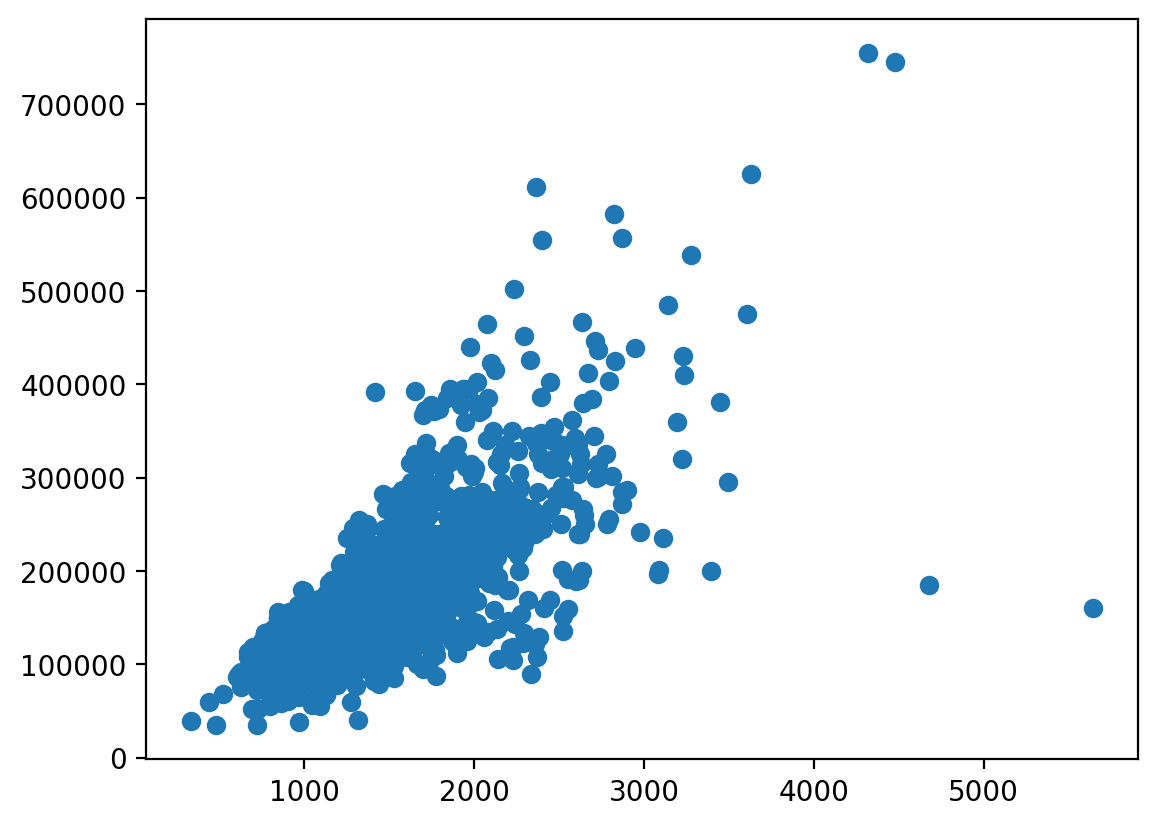

In [110]:
# 산포도(scatter())로 이상치 찾아서 제거
# 'GrLivArea', SalePrice
plt.scatter(df['GrLivArea'],df['SalePrice'])
plt.show()

In [107]:
# 삭제할 샘플(행)의 인덱스 확인 : scatter로 확인했을때 면적이 가장 넓은 2개임
# 삭제할 샘플의 인덱스 추출
del_idx = df.sort_values(by="GrLivArea", ascending=False)["GrLivArea"][:2].index
del_idx

Index([1299, 524], dtype='int64', name='Id')

In [108]:
# 이상치 삭제
df2=df.drop(del_idx)

In [109]:
# 이상치 제거하기 전/후 데이터 크기 비교
df.shape
df2.shape

(1460, 83)

(1458, 83)

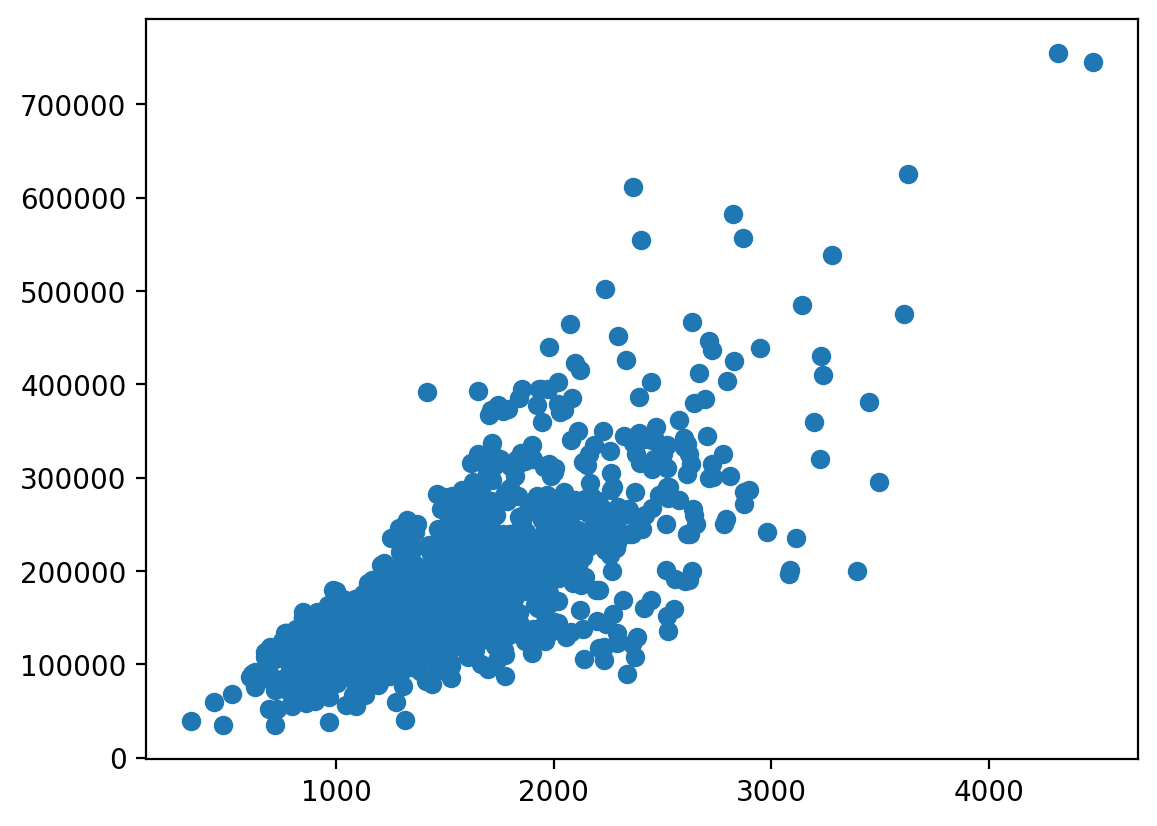

In [111]:
# 'GrLivArea', SalePrice
plt.scatter(df2['GrLivArea'],df2['SalePrice'])
plt.show()

- 이상치 제거할 것인지에 대한 결정은 도메인 지식이 있는 사람이 진행함
- 수치뿐만아니라 수치의 의미가 중요하기 때문에 도메인지식이 매우 중요함

### df에 원-핫 인코딩 수행
- 판다스의 get_dummies() 이용
- pd.get_dummies(df['열'], prefix='문자', dtype=int)

In [112]:
# 원-핫 인코딩 수행
house_df_ohe=pd.get_dummies(df, dtype=int)
# 컬럼 수 비교
print("원-핫 인코딩 수행 전 데이터 shape : ", df.shape)
print("원-핫 인코딩 수행 후 데이터 shape : ", house_df_ohe.shape)

원-핫 인코딩 수행 전 데이터 shape :  (1460, 83)
원-핫 인코딩 수행 후 데이터 shape :  (1460, 291)


### 원-핫 인코딩 수행하면 컬럼 수 증가 
- 필요공간이 커지고
- 따라서 학습/예측 수행 속도가 느려진다
- 현재 data처럼 회귀분석을 진행하는 경우에는 다중공산성(유사한 의미를 지닌) 문제가 발생
- 텍스트 분석을 할때에는 너무 많은 컬럼으로 인해 단어의 유사도 표현 불가

#### 차원과 원핫인코딩 문제 해결
- 비슷한 값을 그룹화해서 컬럼수를 줄임
- 그룹화는 PCA, 차원축소 등 알고리즘들을 이용하는 편이 임의로 진행하는 것보다 낫다
- 빈도가 낮은 값들은 일괄 그룹화(주관적인 견해-도메인지식 필요)